In [ ]:


from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Applied Predictive Analytics/data.csv")


In [ ]:
df


,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401243402,9261,280,274,63.0,60.4,70,3,11.0,...,9.0,2021,1,T9,0.16,-0.33,0.59,-0.11,0.15,0.31
1,B. DeChambeau,401243402,10046,280,274,70.5,65.9,65,3,18.4,...,9.0,2021,1,7,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,B. Horschel,401243402,1651,280,270,72.0,69.2,76,9,22.0,...,9.0,2021,1,T9,0.45,-0.07,0.30,0.64,0.86,1.31
3,B. Koepka,401243402,6798,140,138,34.5,31.1,33,0,0.2,...,9.0,2021,1,WD,0.21,-0.21,-0.85,0.59,-0.47,-0.26
4,C. Conners,401243402,9126,280,278,62.5,56.1,61,0,7.2,...,9.0,2021,1,T22,-0.21,-1.49,0.37,0.64,-0.48,-0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33183,V. Singh,2271,392,144,146,33.0,26.4,26,0,0.6,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33184,W. Kim,2271,7082,144,150,18.5,12.9,21,0,0.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33185,W. McGirt,2271,3532,216,215,44.5,40.6,45,0,6.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33186,Z. Blair,2271,9040,288,278,73.0,70.8,74,3,23.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.shape)

(33188, 37)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33188 entries, 0 to 33187
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  33188 non-null  object 
 1   tournament id        33188 non-null  int64  
 2   player id            33188 non-null  int64  
 3   hole_par             33188 non-null  int64  
 4   strokes              33188 non-null  int64  
 5   hole_DKP             33188 non-null  float64
 6   hole_FDP             33188 non-null  float64
 7   hole_SDP             33188 non-null  int64  
 8   streak_DKP           33188 non-null  int64  
 9   streak_FDP           33188 non-null  float64
 10  streak_SDP           33188 non-null  int64  
 11  n_rounds             33188 non-null  int64  
 12  made_cut             33188 non-null  int64  
 13  pos                  19272 non-null  float64
 14  finish_DKP           33188 non-null  int64  
 15  finish_FDP           33188 non-null 

In [ ]:
df.isnull().any()

Player_initial_last    False
tournament id          False
player id              False
hole_par               False
strokes                False
hole_DKP               False
hole_FDP               False
hole_SDP               False
streak_DKP             False
streak_FDP             False
streak_SDP             False
n_rounds               False
made_cut               False
pos                     True
finish_DKP             False
finish_FDP             False
finish_SDP             False
total_DKP              False
total_FDP              False
total_SDP              False
player                 False
Unnamed: 2              True
Unnamed: 3              True
Unnamed: 4              True
tournament name        False
course                 False
date                   False
purse                  False
season                 False
no_cut                 False
Finish                  True
sg_putt                 True
sg_arg                  True
sg_app                  True
sg_ott        

In [ ]:
df.describe()

,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,...,Unnamed: 4,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
count,3.318800e+04,3.318800e+04,33188.000000,33188.000000,33188.000000,33188.000000,33188.000000,33188.000000,33188.000000,33188.000000,...,0.0,33188.000000,33188.000000,33188.000000,26072.000000,26072.000000,26072.000000,26072.000000,26072.000000,26072.000000
mean,2.145534e+08,6.158399e+04,225.646408,224.268290,50.111923,44.311721,49.272086,1.747077,7.633488,1.660329,...,NaN,7.371921,2018.156412,0.066560,-0.121280,-0.041540,-0.100184,-0.046329,-0.187997,-0.309214
std,2.000813e+08,5.034781e+05,70.342625,66.859615,24.010411,24.080534,22.163555,2.823848,7.198651,2.639085,...,NaN,1.979338,1.991704,0.249263,1.121247,0.725024,1.117349,0.810716,1.638298,1.979110
min,2.230000e+03,5.000000e+00,70.000000,66.000000,-2.500000,-21.400000,-11.000000,0.000000,0.000000,0.000000,...,NaN,3.000000,2015.000000,0.000000,-5.990000,-6.430000,-9.250000,-7.740000,-13.950000,-13.670000
25%,2.529000e+03,1.097000e+03,144.000000,146.000000,27.000000,22.400000,28.000000,0.000000,0.800000,0.000000,...,NaN,6.200000,2016.000000,0.000000,-0.770000,-0.450000,-0.740000,-0.450000,-1.080000,-1.390000
50%,4.010253e+08,3.702000e+03,280.000000,272.000000,54.000000,46.200000,55.000000,0.000000,6.400000,0.000000,...,NaN,7.000000,2018.000000,0.000000,-0.040000,0.000000,0.000000,0.050000,-0.010000,-0.170000
75%,4.011554e+08,6.011000e+03,286.000000,281.000000,69.000000,63.800000,69.000000,3.000000,12.400000,3.000000,...,NaN,8.500000,2020.000000,0.000000,0.630000,0.410000,0.640000,0.480000,0.920000,1.070000
max,4.013175e+08,4.845309e+06,292.000000,325.000000,174.000000,134.700000,104.000000,23.000000,39.800000,22.000000,...,NaN,15.000000,2021.000000,1.000000,4.430000,3.170000,4.670000,2.770000,6.300000,8.520000


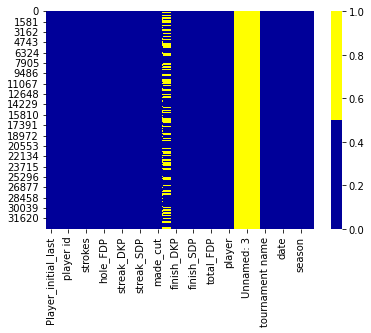

In [ ]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:

# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Player_initial_last - 0%
tournament id - 0%
player id - 0%
hole_par - 0%
strokes - 0%
hole_DKP - 0%
hole_FDP - 0%
hole_SDP - 0%
streak_DKP - 0%
streak_FDP - 0%
streak_SDP - 0%
n_rounds - 0%
made_cut - 0%
pos - 42%
finish_DKP - 0%
finish_FDP - 0%
finish_SDP - 0%
total_DKP - 0%
total_FDP - 0%
total_SDP - 0%
player - 0%
Unnamed: 2 - 100%
Unnamed: 3 - 100%
Unnamed: 4 - 100%
tournament name - 0%
course - 0%
date - 0%
purse - 0%
season - 0%
no_cut - 0%
Finish - 21%
sg_putt - 21%
sg_arg - 21%
sg_app - 21%
sg_ott - 21%
sg_t2g - 21%
sg_total - 21%


We need to identify how to handle columns with missing data. Finish can be dropped as it is the same data as "position".
Unnamed dropped also as no use.
Need to impute a number instead of 'CUT'


In [ ]:
df.columns

Index(['Player_initial_last', 'tournament id', 'player id', 'hole_par',
       'strokes', 'hole_DKP', 'hole_FDP', 'hole_SDP', 'streak_DKP',
       'streak_FDP', 'streak_SDP', 'n_rounds', 'made_cut', 'pos', 'finish_DKP',
       'finish_FDP', 'finish_SDP', 'total_DKP', 'total_FDP', 'total_SDP',
       'player', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'tournament name',
       'course', 'date', 'purse', 'season', 'no_cut', 'Finish', 'sg_putt',
       'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total'],
      dtype='object')

In [ ]:
cols_to_drop = ['hole_DKP', 'hole_FDP', 'hole_SDP', 'streak_DKP', 'hole_FDP', 'hole_SDP', 'streak_DKP',
       'streak_FDP', 'streak_SDP',
       'streak_FDP', 'streak_SDP','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'finish_FDP', 'finish_SDP', 'total_DKP', 'total_FDP', 'total_SDP','finish_DKP','Finish']
df_cleaned = df.drop(cols_to_drop, axis=1)

In [ ]:
df_cleaned

,Player_initial_last,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,player,tournament name,...,date,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401243402,9261,280,274,4,1,9.0,Abraham Ancer,Tour Championship,...,2021-09-05,9.0,2021,1,0.16,-0.33,0.59,-0.11,0.15,0.31
1,B. DeChambeau,401243402,10046,280,274,4,1,7.0,Bryson DeChambeau,Tour Championship,...,2021-09-05,9.0,2021,1,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,B. Horschel,401243402,1651,280,270,4,1,9.0,Billy Horschel,Tour Championship,...,2021-09-05,9.0,2021,1,0.45,-0.07,0.30,0.64,0.86,1.31
3,B. Koepka,401243402,6798,140,138,2,0,NaN,Brooks Koepka,Tour Championship,...,2021-09-05,9.0,2021,1,0.21,-0.21,-0.85,0.59,-0.47,-0.26
4,C. Conners,401243402,9126,280,278,4,1,22.0,Corey Conners,Tour Championship,...,2021-09-05,9.0,2021,1,-0.21,-1.49,0.37,0.64,-0.48,-0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33183,V. Singh,2271,392,144,146,2,0,NaN,Vijay Singh,Frys.com Open,...,2014-10-12,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN
33184,W. Kim,2271,7082,144,150,2,0,NaN,Whee Kim,Frys.com Open,...,2014-10-12,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN
33185,W. McGirt,2271,3532,216,215,3,1,999.0,William McGirt,Frys.com Open,...,2014-10-12,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN
33186,Z. Blair,2271,9040,288,278,4,1,12.0,Zac Blair,Frys.com Open,...,2014-10-12,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df_cleaned['pos'] = df['pos'].fillna(100)
#field of 156 gets cut to 70 lowest scores and ties so replacing cut with finish positon of 100

# numeric
df['pos'] = df['pos'].fillna(100)


In [ ]:
df_cleaned

,Player_initial_last,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,player,tournament name,...,date,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401243402,9261,280,274,4,1,9.0,Abraham Ancer,Tour Championship,...,2021-09-05,9.0,2021,1,0.16,-0.33,0.59,-0.11,0.15,0.31
1,B. DeChambeau,401243402,10046,280,274,4,1,7.0,Bryson DeChambeau,Tour Championship,...,2021-09-05,9.0,2021,1,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,B. Horschel,401243402,1651,280,270,4,1,9.0,Billy Horschel,Tour Championship,...,2021-09-05,9.0,2021,1,0.45,-0.07,0.30,0.64,0.86,1.31
3,B. Koepka,401243402,6798,140,138,2,0,NaN,Brooks Koepka,Tour Championship,...,2021-09-05,9.0,2021,1,0.21,-0.21,-0.85,0.59,-0.47,-0.26
4,C. Conners,401243402,9126,280,278,4,1,22.0,Corey Conners,Tour Championship,...,2021-09-05,9.0,2021,1,-0.21,-1.49,0.37,0.64,-0.48,-0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33183,V. Singh,2271,392,144,146,2,0,NaN,Vijay Singh,Frys.com Open,...,2014-10-12,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN
33184,W. Kim,2271,7082,144,150,2,0,NaN,Whee Kim,Frys.com Open,...,2014-10-12,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN
33185,W. McGirt,2271,3532,216,215,3,1,999.0,William McGirt,Frys.com Open,...,2014-10-12,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN
33186,Z. Blair,2271,9040,288,278,4,1,12.0,Zac Blair,Frys.com Open,...,2014-10-12,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_cleaned.replace('Nan',np.nan, inplace = True)

In [ ]:
df_cleaned

,Player_initial_last,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,player,tournament name,...,date,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401243402,9261,280,274,4,1,9.0,Abraham Ancer,Tour Championship,...,2021-09-05,9.0,2021,1,0.16,-0.33,0.59,-0.11,0.15,0.31
1,B. DeChambeau,401243402,10046,280,274,4,1,7.0,Bryson DeChambeau,Tour Championship,...,2021-09-05,9.0,2021,1,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,B. Horschel,401243402,1651,280,270,4,1,9.0,Billy Horschel,Tour Championship,...,2021-09-05,9.0,2021,1,0.45,-0.07,0.30,0.64,0.86,1.31
3,B. Koepka,401243402,6798,140,138,2,0,NaN,Brooks Koepka,Tour Championship,...,2021-09-05,9.0,2021,1,0.21,-0.21,-0.85,0.59,-0.47,-0.26
4,C. Conners,401243402,9126,280,278,4,1,22.0,Corey Conners,Tour Championship,...,2021-09-05,9.0,2021,1,-0.21,-1.49,0.37,0.64,-0.48,-0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33183,V. Singh,2271,392,144,146,2,0,NaN,Vijay Singh,Frys.com Open,...,2014-10-12,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN
33184,W. Kim,2271,7082,144,150,2,0,NaN,Whee Kim,Frys.com Open,...,2014-10-12,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN
33185,W. McGirt,2271,3532,216,215,3,1,999.0,William McGirt,Frys.com Open,...,2014-10-12,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN
33186,Z. Blair,2271,9040,288,278,4,1,12.0,Zac Blair,Frys.com Open,...,2014-10-12,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_cleaned.dropna(axis = 0, inplace = True)


In [ ]:
df_cleaned

,Player_initial_last,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,player,tournament name,...,date,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401243402,9261,280,274,4,1,9.0,Abraham Ancer,Tour Championship,...,2021-09-05,9.0,2021,1,0.16,-0.33,0.59,-0.11,0.15,0.31
1,B. DeChambeau,401243402,10046,280,274,4,1,7.0,Bryson DeChambeau,Tour Championship,...,2021-09-05,9.0,2021,1,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,B. Horschel,401243402,1651,280,270,4,1,9.0,Billy Horschel,Tour Championship,...,2021-09-05,9.0,2021,1,0.45,-0.07,0.30,0.64,0.86,1.31
4,C. Conners,401243402,9126,280,278,4,1,22.0,Corey Conners,Tour Championship,...,2021-09-05,9.0,2021,1,-0.21,-1.49,0.37,0.64,-0.48,-0.69
5,C. Morikawa,401243402,10592,280,283,4,1,26.0,Collin Morikawa,Tour Championship,...,2021-09-05,9.0,2021,1,-1.12,-0.22,-0.22,-0.38,-0.82,-1.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33071,W. Kim,2260,7082,284,277,4,1,49.0,Whee Kim,Shriners Hospital for Children Open,...,2014-10-19,6.2,2015,0,0.66,-0.27,0.26,-0.39,-0.41,0.25
33072,W. McGirt,2260,3532,284,275,4,1,33.0,William McGirt,Shriners Hospital for Children Open,...,2014-10-19,6.2,2015,0,0.09,0.36,-0.37,0.66,0.66,0.75
33073,W. Roach,2260,6185,284,276,4,1,42.0,Wes Roach,Shriners Hospital for Children Open,...,2014-10-19,6.2,2015,0,0.55,0.04,0.54,-0.64,-0.05,0.50
33074,W. Simpson,2260,1614,284,269,4,1,4.0,Webb Simpson,Shriners Hospital for Children Open,...,2014-10-19,6.2,2015,0,-0.02,0.76,1.23,0.28,2.27,2.25


In [ ]:
df_cleaned.isna().any()

Player_initial_last    False
tournament id          False
player id              False
hole_par               False
strokes                False
n_rounds               False
made_cut               False
pos                    False
player                 False
tournament name        False
course                 False
date                   False
purse                  False
season                 False
no_cut                 False
sg_putt                False
sg_arg                 False
sg_app                 False
sg_ott                 False
sg_t2g                 False
sg_total               False
dtype: bool

In [ ]:
df_cleaned.drop(df_cleaned[df_cleaned['pos'] >= 100].index, inplace = True)

In [ ]:
df_cleaned


,Player_initial_last,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,player,tournament name,...,date,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401243402,9261,280,274,4,1,9.0,Abraham Ancer,Tour Championship,...,2021-09-05,9.0,2021,1,0.16,-0.33,0.59,-0.11,0.15,0.31
1,B. DeChambeau,401243402,10046,280,274,4,1,7.0,Bryson DeChambeau,Tour Championship,...,2021-09-05,9.0,2021,1,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,B. Horschel,401243402,1651,280,270,4,1,9.0,Billy Horschel,Tour Championship,...,2021-09-05,9.0,2021,1,0.45,-0.07,0.30,0.64,0.86,1.31
4,C. Conners,401243402,9126,280,278,4,1,22.0,Corey Conners,Tour Championship,...,2021-09-05,9.0,2021,1,-0.21,-1.49,0.37,0.64,-0.48,-0.69
5,C. Morikawa,401243402,10592,280,283,4,1,26.0,Collin Morikawa,Tour Championship,...,2021-09-05,9.0,2021,1,-1.12,-0.22,-0.22,-0.38,-0.82,-1.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33071,W. Kim,2260,7082,284,277,4,1,49.0,Whee Kim,Shriners Hospital for Children Open,...,2014-10-19,6.2,2015,0,0.66,-0.27,0.26,-0.39,-0.41,0.25
33072,W. McGirt,2260,3532,284,275,4,1,33.0,William McGirt,Shriners Hospital for Children Open,...,2014-10-19,6.2,2015,0,0.09,0.36,-0.37,0.66,0.66,0.75
33073,W. Roach,2260,6185,284,276,4,1,42.0,Wes Roach,Shriners Hospital for Children Open,...,2014-10-19,6.2,2015,0,0.55,0.04,0.54,-0.64,-0.05,0.50
33074,W. Simpson,2260,1614,284,269,4,1,4.0,Webb Simpson,Shriners Hospital for Children Open,...,2014-10-19,6.2,2015,0,-0.02,0.76,1.23,0.28,2.27,2.25


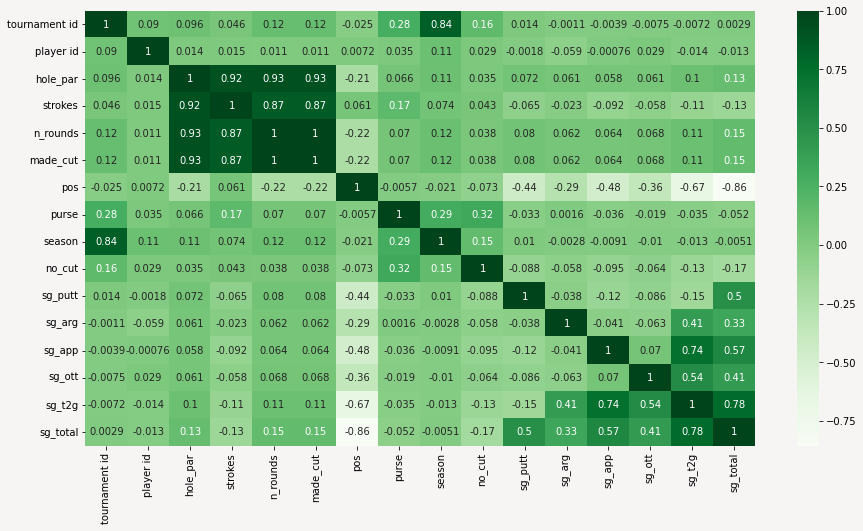

In [ ]:
plt.figure(figsize = (15, 8), facecolor = "#F7F4F4")
sns.heatmap(df_cleaned.corr(), annot = True, cmap = "Greens");

<Figure size 1080x576 with 0 Axes>

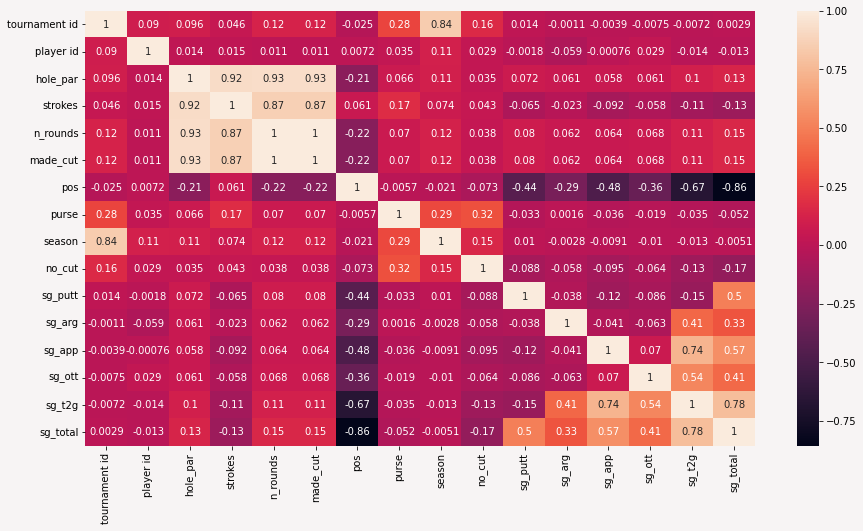

<Figure size 1080x576 with 0 Axes>

In [ ]:
plt.figure(figsize = (15, 8), facecolor = "#F7F4F4")

ax = sns.heatmap(df_cleaned.corr(), annot=True)
plt.figure(figsize = (15, 8), facecolor = "#F7F4F4")

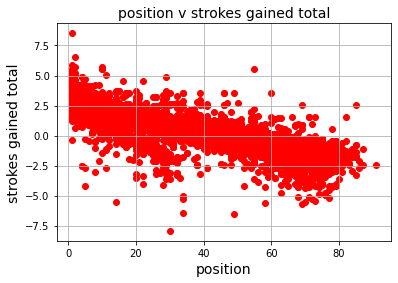

In [ ]:
plt.scatter(df_cleaned['pos'], df_cleaned['sg_total'], color='red')
plt.title('position v strokes gained total', fontsize=14)
plt.xlabel('position', fontsize=14)
plt.ylabel('strokes gained total', fontsize=14)
plt.grid(True)
plt.show()

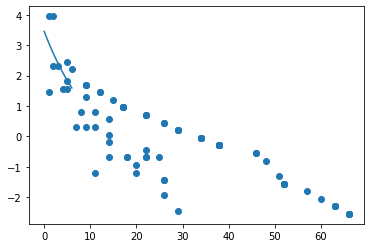

In [ ]:
import numpy
import matplotlib.pyplot as plt


train_x = df_cleaned['pos'][:80]
train_y = df_cleaned['sg_total'][:80]

test_x = df_cleaned['pos'][:80]
test_y = df_cleaned['sg_total'][:80]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

In [ ]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()



X = df_cleaned[['hole_par', 'strokes']]
y = df_cleaned['pos']

scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[288, 270]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[5.45929132]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

from sklearn.linear_model import LinearRegression

# Build linear regression model using shotsgained off the tee  and shots gained poutting as predictors
# Split data into predictors X and output Y
predictors = ['sg_putt','sg_arg', 'sg_app', 'sg_ott', 'sg_t2g']
X = df_cleaned[predictors]
y = df_cleaned['pos']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [ ]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 44.53215899497293
betas = [-13.62189931 -19.0749548  -18.69901865 -19.35207353   5.43447285]


In [ ]:
model.predict(X)

array([40.5588682 , 39.94716391, 26.41616513, ..., 38.29324953,
       14.22551116, 56.07268509])

In [ ]:
new_X = [[0.95, 0.9,.45,.1,1]]
print(model.predict(new_X))

[9.50860243]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Logistic regression


In [ ]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
predictors = ['sg_total']
X = numpy.array(df_cleaned[predictors]).reshape(-1,1)
y = numpy.array(df_cleaned['made_cut'])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if the cut will be made where strokes gained tee to green is +1.0
predicted = logr.predict(numpy.array([.40]).reshape(-1,1))
print(predicted)

[1]


#Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
df_cleaned.describe()

,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.00000,14605.000000,14605.000000,14605.000000
mean,2.225811e+08,4.685215e+04,282.356933,277.703732,3.975214,0.987675,34.234235,7.494509,2018.221499,0.103526,0.243076,0.111439,0.26954,0.135938,0.517022,0.760173
std,1.993601e+08,4.324440e+05,16.825775,17.791057,0.220962,0.110334,21.481368,1.787744,1.943682,0.304655,0.860088,0.560154,0.85386,0.610048,1.185937,1.358031
min,2.232000e+03,5.000000e+00,140.000000,134.000000,2.000000,0.000000,1.000000,3.500000,2015.000000,0.000000,-3.330000,-2.650000,-9.25000,-4.080000,-10.370000,-7.940000
25%,2.696000e+03,1.170000e+03,280.000000,274.000000,4.000000,1.000000,16.000000,6.400000,2017.000000,0.000000,-0.320000,-0.250000,-0.27000,-0.240000,-0.220000,-0.070000
50%,4.010253e+08,3.792000e+03,284.000000,279.000000,4.000000,1.000000,32.000000,7.000000,2018.000000,0.000000,0.250000,0.110000,0.29000,0.170000,0.570000,0.810000
75%,4.011554e+08,6.011000e+03,288.000000,285.000000,4.000000,1.000000,52.000000,8.750000,2020.000000,0.000000,0.810000,0.470000,0.83000,0.540000,1.310000,1.640000
max,4.013175e+08,4.845308e+06,292.000000,313.000000,4.000000,1.000000,91.000000,15.000000,2021.000000,1.000000,4.430000,2.910000,4.67000,2.770000,5.250000,8.520000


In [ ]:
target_column = ['pos'] 
predictors = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']
df_cleaned[predictors] = df[predictors]/df[predictors].max()
df_cleaned.describe()

,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,2.225811e+08,4.685215e+04,282.356933,277.703732,3.975214,0.987675,34.234235,7.494509,2018.221499,0.103526,0.054871,0.035154,0.057717,0.049075,0.082067,0.089222
std,1.993601e+08,4.324440e+05,16.825775,17.791057,0.220962,0.110334,21.481368,1.787744,1.943682,0.304655,0.194151,0.176705,0.182839,0.220234,0.188244,0.159393
min,2.232000e+03,5.000000e+00,140.000000,134.000000,2.000000,0.000000,1.000000,3.500000,2015.000000,0.000000,-0.751693,-0.835962,-1.980728,-1.472924,-1.646032,-0.931925
25%,2.696000e+03,1.170000e+03,280.000000,274.000000,4.000000,1.000000,16.000000,6.400000,2017.000000,0.000000,-0.072235,-0.078864,-0.057816,-0.086643,-0.034921,-0.008216
50%,4.010253e+08,3.792000e+03,284.000000,279.000000,4.000000,1.000000,32.000000,7.000000,2018.000000,0.000000,0.056433,0.034700,0.062099,0.061372,0.090476,0.095070
75%,4.011554e+08,6.011000e+03,288.000000,285.000000,4.000000,1.000000,52.000000,8.750000,2020.000000,0.000000,0.182844,0.148265,0.177730,0.194946,0.207937,0.192488
max,4.013175e+08,4.845308e+06,292.000000,313.000000,4.000000,1.000000,91.000000,15.000000,2021.000000,1.000000,1.000000,0.917981,1.000000,1.000000,0.833333,1.000000


In [ ]:
X = df_cleaned[predictors].values
y = df_cleaned[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape); print(X_test.shape)

(11684, 6)
(2921, 6)


#linear regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))


10.912440239671485
0.7401955278811687
11.71047894988631
0.7103178000639008


In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

10.914267278900999
0.7401085239317826
11.711810337693578
0.7102519272204488


In [ ]:
model_lasso = Lasso(alpha=.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

10.91713810784498
0.7399717850965922
11.711193663459907
0.7102824392354952


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.579e+02, tolerance: 5.355e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

10.99233972509071
0.7363770898836606
11.71927499970625
0.7098824607356455
